# Use Vortex and arpifs_listings to plot the cost function evolution during a minimisation

In [1]:
%load_ext ivortex
%vortex tmpcocoon

Vortex 1.4.0 loaded ( Thursday 09. August 2018, at 16:54:14 )


# [2018/08/09-16:54:15][vortex.sessions][_set_rundir:0150][WARNING]: Session <root> is changing its working directory </sauvegarde/vortex-dev/vortex/examples/notebooks/integration>
# [2018/08/09-16:54:15][vortex.sessions][_set_rundir:0153][INFO]: Session <root> set rundir </home/meunierlf/vortex-workdir/auto_cocoon_IPwB2r>


The working directory is now: /home/meunierlf/vortex-workdir/auto_cocoon_IPwB2r/root


u'/home/meunierlf/vortex-workdir/auto_cocoon_IPwB2r'

In [2]:
%pylab --no-import-all
%matplotlib inline
from bronx.stdtypes import date

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Fetch listings and store the associated CostFunctions objects

See the arpifs_listings Sphinx' documentation for more details on the CostFunctions objects.

In [3]:
xpids = ('OPER', 'DBLE')
a_date = date.Date('2017110102')

desc = dict(kind='plisting', cutoff='production', seta=1, setb=1,
            task='minim', model='[vapp]', vapp='arome', vconf='pifrance',
            namespace='vortex.multi.fr', format='arpifslist')

ldata = dict()
for xpid in xpids:
    with sh.ftppool():
        thelisting = toolbox.input(date=a_date, shouldfly=True, now=True, verbose=False, loglevel='WARNING',
                                   experiment=xpid, block='minim', **desc)
        print '{:s} {:s}: j={!s}'.format(xpid, a_date.ymdh, 
                                         thelisting[0].contents.data.cost_functions[(999, 999)].j)
        ldata[xpid] = thelisting[0].contents.data.cost_functions
        thelisting[0].reset_contents()
        thelisting[0].clear()

OPER 2017110102: j=238.881004873
DBLE 2017110102: j=1145.34528339


## Cost function related data are accessible directly through the CostFunctions objects

What are the minimisation iterations :

In [4]:
ldata['OPER'].keys()

[BareCostFunctionKey(iter=0, sim=0),
 BareCostFunctionKey(iter=1, sim=1),
 BareCostFunctionKey(iter=2, sim=2),
 BareCostFunctionKey(iter=3, sim=3),
 BareCostFunctionKey(iter=4, sim=4),
 BareCostFunctionKey(iter=5, sim=5),
 BareCostFunctionKey(iter=6, sim=6),
 BareCostFunctionKey(iter=7, sim=7),
 BareCostFunctionKey(iter=8, sim=8),
 BareCostFunctionKey(iter=9, sim=9),
 BareCostFunctionKey(iter=9, sim=10),
 BareCostFunctionKey(iter=10, sim=11),
 BareCostFunctionKey(iter=11, sim=12),
 BareCostFunctionKey(iter=12, sim=13),
 BareCostFunctionKey(iter=13, sim=14),
 BareCostFunctionKey(iter=14, sim=15),
 BareCostFunctionKey(iter=15, sim=16),
 BareCostFunctionKey(iter=16, sim=17),
 BareCostFunctionKey(iter=17, sim=18),
 BareCostFunctionKey(iter=18, sim=19),
 BareCostFunctionKey(iter=19, sim=20),
 BareCostFunctionKey(iter=20, sim=21),
 BareCostFunctionKey(iter=21, sim=22),
 BareCostFunctionKey(iter=22, sim=23),
 BareCostFunctionKey(iter=23, sim=24),
 BareCostFunctionKey(iter=24, sim=25),
 BareCo

Print some informations about the last iteration

In [5]:
i = (999, 999)
print 'J     :', ldata['OPER'][i].j
print 'gradJ :', ldata['OPER'][i].gradj
print 'Jo    :', ldata['OPER'][i].jo
print 'Jb    :', ldata['OPER'][i].jb

J     : 238.881004873
gradJ : 74.0082998231
Jo    : 133.816313373
Jb    : 105.0646915


## Define an utility function that will plot the data

In [6]:
from collections import defaultdict

def plot_iter(ldatas, what):
    """A small plot function
    
    :param ldatas: The dictionary of CostFunctions to plot
    :param what: What parameter should be plotted ()'j', 'jo', ...)
    """
    fig, ax = plt.subplots(figsize=(13,8))
    # What is the maximum number of simulations
    maxnsim = 0
    for data in ldata.values():
        maxnsim = max(maxnsim, len([k.sim for k in data.keys() if k.iter != 999]))
    # Generate numpy arrays for each of the CostFunctions object
    ydata = defaultdict(lambda: np.ma.masked_all((maxnsim, )))
    for xpid, data in ldatas.items():
        values = [getattr(v, what) for k, v in data.items() if k.iter != 999]
        ydata[xpid][:len(values)] = values
    # Plot things...
    for xpid, y in ydata.items():
        ax.plot(range(0, maxnsim), y, label=xpid)
    # Label + legend
    ax.grid(True)
    ax.set_ylabel(what)
    ax.legend(loc='best', prop={'size':'small'})

## The total cost function

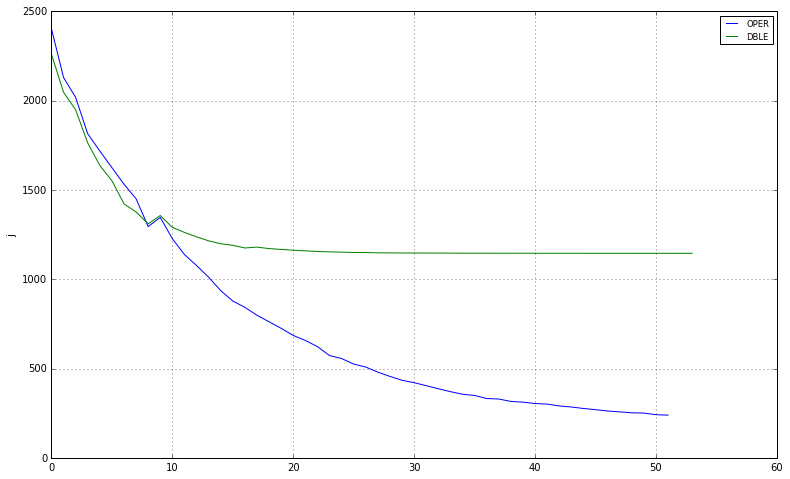

In [7]:
plot_iter(ldata, 'j')

## The part of the cost function related to the background term

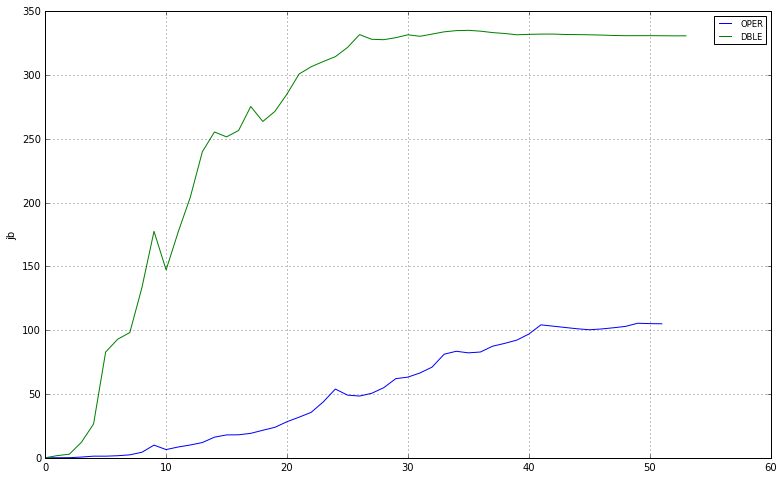

In [8]:
plot_iter(ldata, 'jb')

## The part of the cost function related to the observations

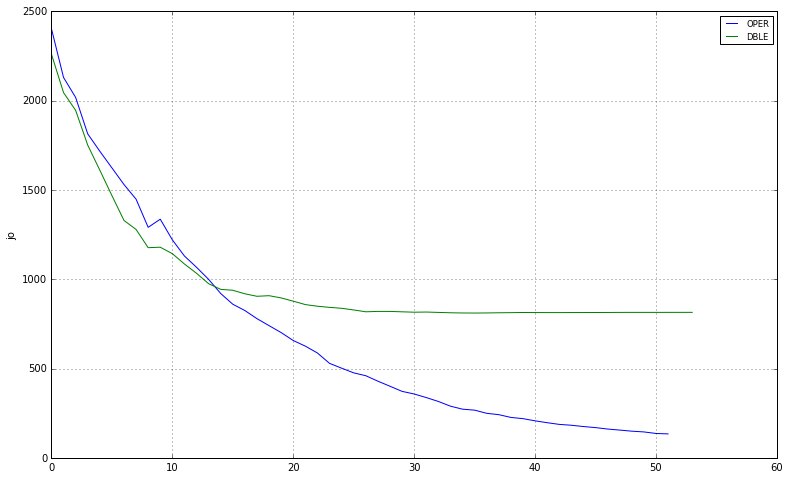

In [9]:
plot_iter(ldata, 'jo')